# Understanding Supervised Learning

_Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs_

![Image](../images/ml_map.jpg)

## Before we start:

- __Data exploration:__ 

Shape, Descriptive statistics (numeric, categorical, timestamp), Visualization, Domain knowledge 

- __Data transformations:__ 

Arbitrary, Modeling (joins, feature eng.), Performance (outliers, scaling, encoding)

![Image](https://media.giphy.com/media/ZThQqlxY5BXMc/giphy.gif)

In [1]:
# Imports

import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

/Users/pedroconsuegramateo/opt/miniconda3/envs/m3_ih/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [32]:
# Read data

file = '../data/baseball_1000k_ok.csv'
data = pd.read_csv(file)
data.head()

,time,distance,speed
0,0.412841,18.39,44.545027
1,0.438763,18.39,41.913254
2,0.507000,18.39,36.272218
3,0.463885,18.39,39.643439
4,0.492664,18.39,37.327692


In [33]:
# Shape

data.shape

(1000000, 3)

In [34]:
# Descriptive statistics

data.describe()

,time,distance,speed
count,1000000.000000,1.000000e+06,1000000.000000
mean,0.462543,1.839000e+01,39.921724
std,0.029529,2.574084e-10,2.561189
min,0.411409,1.839000e+01,35.800014
25%,0.436925,1.839000e+01,37.676564
50%,0.462588,1.839000e+01,39.754635
75%,0.488102,1.839000e+01,42.089584
max,0.513687,1.839000e+01,44.699991


'../data/baseball_1000k_ok.csv'

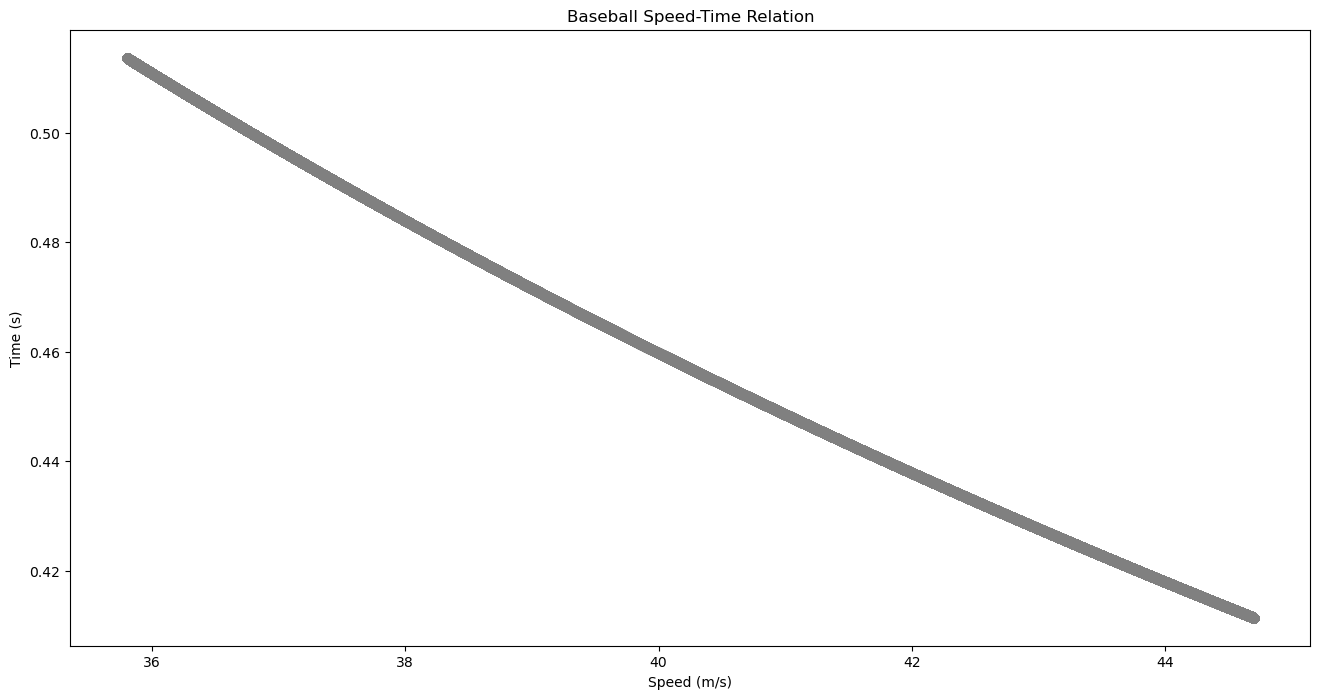

In [35]:
# Visualization

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,8))
ax.set(xlabel='Speed (m/s)', 
       ylabel='Time (s)',
       title='Baseball Speed-Time Relation')
ax.scatter(data['speed'], data['time'], c='grey')
file

### Domain knowledge

![Image](../images/velocity.png)

![Image](https://media.giphy.com/media/l0HlIJQUdby5FzlZe/giphy.gif)

In [36]:
# Features and predictions

X = data[['time','distance']]
y = data['speed']
print(X.shape,y.shape)

(1000000, 2) (1000000,)


In [37]:
X

,time,distance
0,0.412841,18.39
1,0.438763,18.39
2,0.507000,18.39
3,0.463885,18.39
4,0.492664,18.39
...,...,...
999995,0.497637,18.39
999996,0.457563,18.39
999997,0.417472,18.39
999998,0.477452,18.39


In [38]:
y

0         44.545027
1         41.913254
2         36.272218
3         39.643439
4         37.327692
            ...    
999995    36.954674
999996    40.191155
999997    44.050816
999998    38.516969
999999    42.278085
Name: speed, Length: 1000000, dtype: float64

---

## Train-Test Split:

![Image](../images/train-test-split.jpg)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
print(f"X_train: {type(X_train)}, X_test: {type(X_test)}, y_train: {type(y_train)}, y_test: {type(y_test)}")

X_train: (800000, 2), X_test: (200000, 2), y_train: (800000,), y_test: (200000,)
X_train: <class 'pandas.core.frame.DataFrame'>, X_test: <class 'pandas.core.frame.DataFrame'>, y_train: <class 'pandas.core.series.Series'>, y_test: <class 'pandas.core.series.Series'>


In [40]:
X_train.describe()

,time,distance
count,800000.000000,8.000000e+05
mean,0.462539,1.839000e+01
std,0.029531,1.727544e-10
min,0.411409,1.839000e+01
25%,0.436921,1.839000e+01
50%,0.462572,1.839000e+01
75%,0.488090,1.839000e+01
max,0.513687,1.839000e+01


In [41]:
y_train.describe()

count    800000.000000
mean         39.922078
std           2.561350
min          35.800014
25%          37.677472
50%          39.755935
75%          42.090029
max          44.699991
Name: speed, dtype: float64

In [42]:
X_test.describe()

,time,distance
count,200000.000000,2.000000e+05
mean,0.462558,1.839000e+01
std,0.029520,3.030117e-11
min,0.411410,1.839000e+01
25%,0.436937,1.839000e+01
50%,0.462648,1.839000e+01
75%,0.488158,1.839000e+01
max,0.513687,1.839000e+01


In [43]:
y_test.describe()

count    200000.000000
mean         39.920307
std           2.560552
min          35.800025
25%          37.672239
50%          39.749457
75%          42.088487
max          44.699987
Name: speed, dtype: float64

---

## Models

![Image](../images/models.png)

### _Linear Regression (test-in-training)_ 

In [44]:
%%time

# Model definition

model = LinearRegression()
print(type(model))

<class 'sklearn.linear_model._base.LinearRegression'>
CPU times: user 328 µs, sys: 72 µs, total: 400 µs
Wall time: 393 µs


In [45]:
%%time

# Model training

weights = model.fit(X, y)
print(type(weights))

<class 'sklearn.linear_model._base.LinearRegression'>
CPU times: user 87.7 ms, sys: 56.1 ms, total: 144 ms
Wall time: 100 ms


In [46]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

<class 'numpy.ndarray'>
CPU times: user 2.6 ms, sys: 2.56 ms, total: 5.16 ms
Wall time: 1.62 ms


In [47]:
# RMSE

tricky_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {tricky_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

Speed predictions error is: +/- 0.14677 m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)


### _Linear Regression (the-real-stuff)_ 

In [48]:
%%time

# Model definition

model = LinearRegression()
print(type(model))

<class 'sklearn.linear_model._base.LinearRegression'>
CPU times: user 350 µs, sys: 101 µs, total: 451 µs
Wall time: 428 µs


In [49]:
%%time

# Model training

weights = model.fit(X_train, y_train)
print(type(weights))

<class 'sklearn.linear_model._base.LinearRegression'>
CPU times: user 79 ms, sys: 57.4 ms, total: 136 ms
Wall time: 82.2 ms


In [50]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

<class 'numpy.ndarray'>
CPU times: user 2.22 ms, sys: 1.9 ms, total: 4.13 ms
Wall time: 1.7 ms


In [51]:
# RMSE

real_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {real_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

Speed predictions error is: +/- 0.14677 m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)


In [52]:
# RMSE comparison

print(f"The real_error is {round(real_error/tricky_error, 2)} times the tricky_error")

The real_error is 1.0 times the tricky_error


---

### _Random Forest Regressor (test-in-training)_ 

In [53]:
%%time

# Model definition

model = RandomForestRegressor()
print(type(model))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
CPU times: user 727 µs, sys: 673 µs, total: 1.4 ms
Wall time: 1.89 ms


In [54]:
%%time

# Model training

weights = model.fit(X, y)
print(type(weights))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
CPU times: user 1min 22s, sys: 995 ms, total: 1min 23s
Wall time: 1min 23s


In [55]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

<class 'numpy.ndarray'>
CPU times: user 6.08 s, sys: 619 ms, total: 6.69 s
Wall time: 6.99 s


In [56]:
# RMSE

tricky_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {tricky_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

Speed predictions error is: +/- 0.0 m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)


### _Random Forest Regressor (the-real-stuff)_ 

In [57]:
%%time

# Model definition

model = RandomForestRegressor()
print(type(model))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
CPU times: user 60 µs, sys: 19 µs, total: 79 µs
Wall time: 82 µs


In [58]:
%%time

# Model training

weights = model.fit(X_train, y_train)
print(type(weights))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
CPU times: user 1min 4s, sys: 902 ms, total: 1min 5s
Wall time: 1min 5s


In [59]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

<class 'numpy.ndarray'>
CPU times: user 5.78 s, sys: 368 ms, total: 6.15 s
Wall time: 6.15 s


In [60]:
# RMSE

real_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {real_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

Speed predictions error is: +/- 1e-05 m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)


In [61]:
# RMSE comparison

print(f"The real_error is {round(real_error/tricky_error, 2)} times the tricky_error")

The real_error is inf times the tricky_error


/var/folders/n3/xb6jll3d49q147jw5_13y6zm0000gn/T/ipykernel_3709/988699822.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  print(f"The real_error is {round(real_error/tricky_error, 2)} times the tricky_error")


---